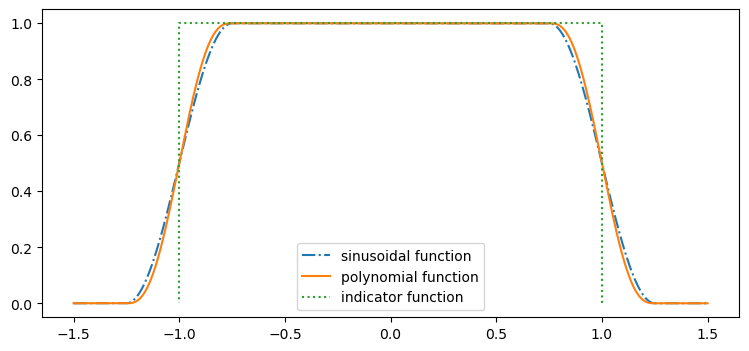

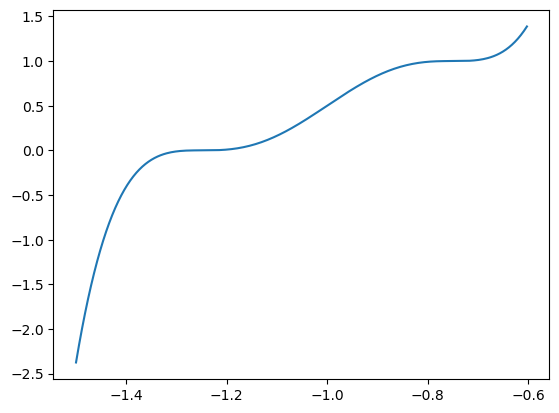

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

xx = np.linspace(-1.5, 1.5, 1000)

def seno(x):
    return (1+np.sin(2*np.pi*x))/2 * tf.where(x<-3/4, 1.0, 0.0) * tf.where(x>=-5/4, 1.0, 0.0) \
        + 1 * tf.where(x<3/4, 1.0, 0.0) * tf.where(x>=-3/4, 1.0, 0.0) \
        + (1-np.sin(2*np.pi*x))/2 * tf.where(x<5/4, 1.0, 0.0) * tf.where(x>=3/4, 1.0, 0.0)

def func_dx(x, a=0):
    c1 = - 0.16171875
    res = (c1 + 1/5*(x-a)**5 - (x-a)**4 + 47/24*(x-a)**3 - 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666667
    return res

def func_sx(x, a=0):
    c2 =  0.1627604166666665
    res = (c2 + 1/5*(x-a)**5 + (x-a)**4 + 47/24*(x-a)**3 + 15/8*(x-a)**2 + 225/256*(x-a))/0.001041666666666
    return res

def pou(x, a=-1, b=1, lim_sx=-1, lim_dx=1):
    return tf.clip_by_value(1-func_dx(x, b-lim_dx), 0.0, 1.0) + tf.clip_by_value(func_sx(x, a-lim_sx), 0.0, 1.0) - 1

ones = np.ones(100)
x = np.zeros(200)
y = np.zeros(200)
y1 = np.linspace(0, 1, 100)
y2 = np.linspace(1, -1, 100)
x[:100] = ones
#x[100:200] = y2
x[100:] = -ones

y[:100] = y1
#y[100:200] = y2
y[100:] = np.flip(y1)

plt.figure(figsize=(9,4))
plt.plot(xx, seno(xx), '-.',label='sinusoidal function')
plt.plot(xx, pou(xx), label='polynomial function')
#plt.plot(ones, y1, '--', -ones, y1, '--')
plt.plot(x,y,':', label='indicator function')
plt.legend()
plt.show()
plt.plot(xx[:300],func_sx(xx[:300]))

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [3]:
npart = 4
geom = dde.geometry.Interval(-2, 2)
ind = dde.nn.pou_indicators(geom, npart)
xx = np.linspace(-2, 2)
sum = np.zeros(xx.shape)
for i in range(npart):
    sum += ind[i](xx)
print(sum)

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.], shape=(50,), dtype=float64)


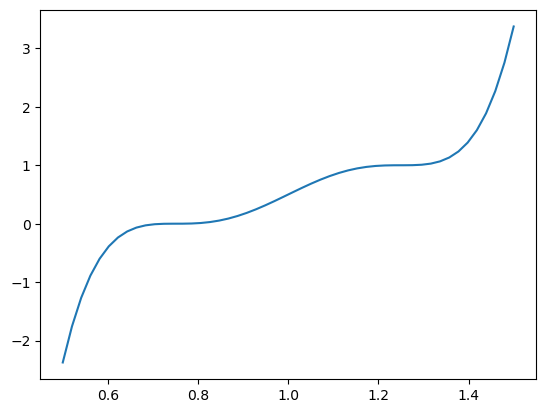

In [8]:
a = np.linspace(0.5, 1.5)
plt.plot(a, dde.nn.func_dx(a))